In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import statsmodels.api as sm

In [9]:
salesd=pd.read_csv("C:/Users/Lenovo/OneDrive/Desktop/ICT Academy/3CS-Add_sales_data_2018.csv")
salesd.head()

,Date,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4093.065
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,4042.448
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,4213.819
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,4391.665
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,4350.683


In [10]:
salesd.pop('Date')
salesd.isnull().sum()

Add1(in Thousands)      0
Add2(in Thousands)      0
Add3(in Thousands)      0
Add4(in Thousands)      0
Add5(in Thousands)      0
Profit(in Thousands)    0
dtype: int64

Here we have delete the column of date, because it is not neccessory for further calculation. Also there are no null value in data set. all value are in interger data type.

# 1. Checking Feature reduction.

## (i) Using correlation matrix

In [11]:
salesd.corr()

,Add1(in Thousands),Add2(in Thousands),Add3(in Thousands),Add4(in Thousands),Add5(in Thousands),Profit(in Thousands)
Add1(in Thousands),1.000000,0.990976,0.986274,0.976365,0.976716,0.991975
Add2(in Thousands),0.990976,1.000000,0.987990,0.989921,0.990285,0.999145
Add3(in Thousands),0.986274,0.987990,1.000000,0.991343,0.991908,0.993389
Add4(in Thousands),0.976365,0.989921,0.991343,1.000000,0.999699,0.993346
Add5(in Thousands),0.976716,0.990285,0.991908,0.999699,1.000000,0.993710
Profit(in Thousands),0.991975,0.999145,0.993389,0.993346,0.993710,1.000000


## (ii) Using TreeMap

<AxesSubplot:>

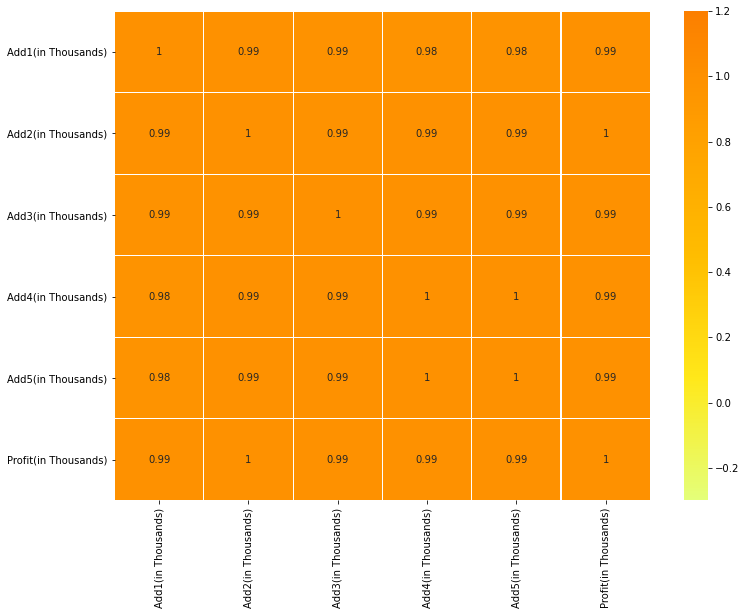

In [12]:
cormtx=salesd.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cormtx,vmin=-0.3,vmax=1.2,annot=True,linewidth=0.15,cmap='Wistia')

## (iii) Using Plots 

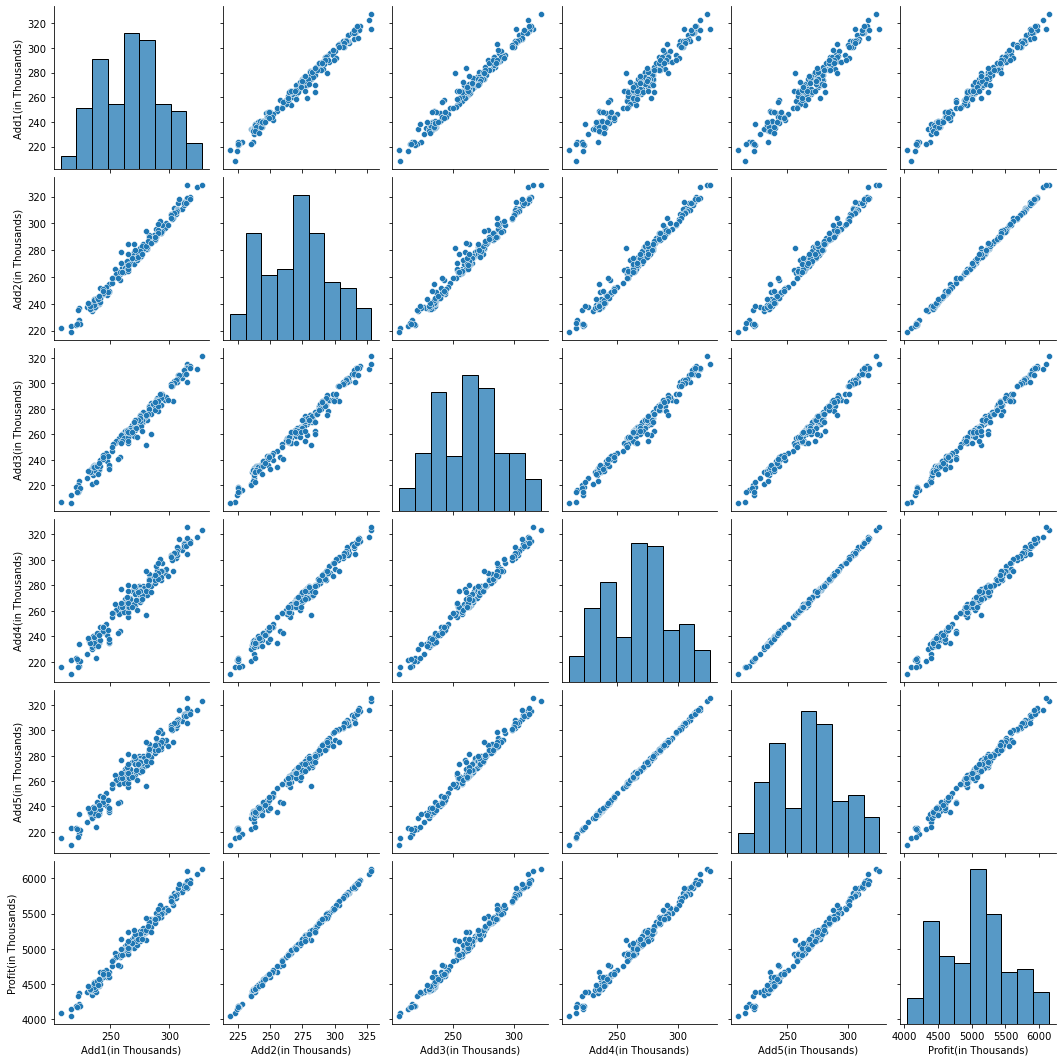

In [13]:
sns.pairplot(salesd)

**Interpretation:**
***
While all the methods the independent variables; add1, add2, add3, add4, add5 and dependent variale Profit are very much linearly correlated and among these independent variables add2 and profit show best linear relationship than any other variables.


# 2. Fit Model to given data.

## Step 1. Finding response variable, y and predictor variables, x

In [14]:
x=salesd.drop(['Profit(in Thousands)'],axis=1).values
y=salesd['Profit(in Thousands)'].values
x

array([[208.  , 222.25, 206.85, 216.  , 215.15],
       [217.  , 218.6 , 205.9 , 210.25, 209.2 ],
       [223.5 , 227.8 , 216.15, 217.25, 218.2 ],
       ...,
       [298.6 , 298.6 , 286.65, 287.45, 287.8 ],
       [290.  , 299.55, 285.9 , 297.85, 298.35],
       [287.55, 289.9 , 285.05, 288.05, 288.45]])

## Step 2. Spliting data set to training set and testing set.

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

From the above we have split the data into training and testing n the ratio of 3:1.

## Step 3. Fit the model to Training set.

In [16]:
from sklearn.linear_model import LinearRegression
mlr=LinearRegression()
print(mlr.fit(x_train,y_train))
print(mlr.coef_)
print(mlr.intercept_)

LinearRegression()
[ 1.   12.38  3.5   1.    0.9 ]
3.637978807091713e-12


From the provided, predicted profit = 3.638e-12 + 1 (add1) + 12.38 (add2) + 3.5 (add3) + 1 (add4) + 0.9 (add5)

## Step 4. using the model to find the predicted value from testing values.

In [17]:
yhat=mlr.predict(x_test)
print(yhat)

[4152.066 4446.441 5131.898 4907.56  5004.282 4623.793 5384.175 5328.025
 5175.051 5956.323 5780.799 4997.719 5075.858 5784.54  4936.12  5065.652
 4190.965 5034.726 5015.536 5134.657 5145.131 5421.94  4569.293 4598.292
 4436.321 4175.677 5616.791 5667.25  4648.834 5717.838 5001.615 5182.368
 5017.503 5545.013 5013.207 5030.451 5108.626 4760.877 4606.34  4925.861
 5250.788 5038.222 5491.792 5019.997 4647.356 4486.38  4435.174 5300.437
 5425.19  4482.183 4193.095 6062.457]


## Step 5. (i) How good the fit for model.

In [18]:
from sklearn.metrics import r2_score
print('R-squared :',r2_score(y_test,yhat))


R-squared : 1.0


**Interpretation:**
****
Sicne the R-sqaured is 1.0 which is 100%, that means 100% of vairation in profit were explained by the all five predictor/independent variables.


## Step 5. (ii) Using the plot of fitted model.

Text(0.5, 1.0, 'Plot of Actual Vs Fitted')

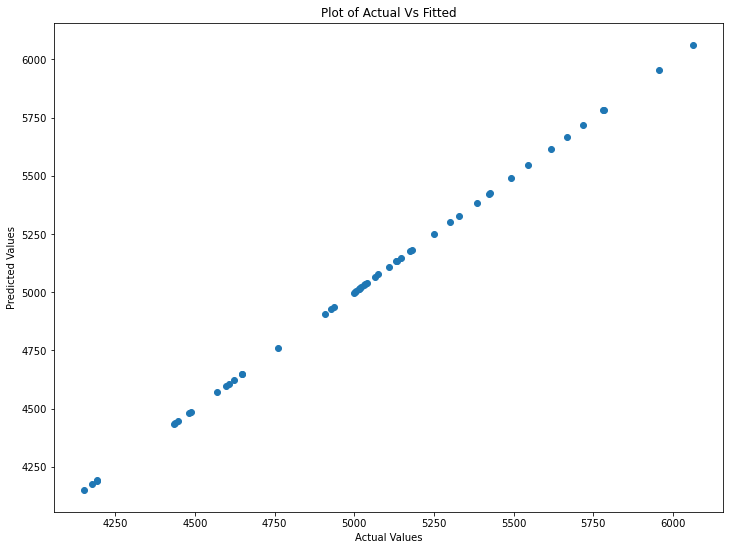

In [20]:
plt.figure(figsize=(12,9))
plt.scatter(y_test,yhat)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Plot of Actual Vs Fitted')

# 3. Predict the profit for given ad's 

In [96]:
print('predicted profit=',mlr.predict([[290,312,309,298,320]]))

predicted profit= [5820.06]


Here the predicted profit when add1 = 290, add2 = 312, add3 = 309, add4 = 298 & add5 = 320 is approximately equal to $5820.06